# Import Things

In [1]:
import numpy as np
from random import randint
import os
import json
import settings
import pickle
import nltk.data
from pyvi import ViTokenizer

/home/canle/WorkSpace/Topic_classification/feature_extraction/raw_data/


## Read file

In [2]:
class FileReader(object):
    def __init__(self, filePath, encoder = None):
        self.filePath = filePath
        self.encoder = encoder if encoder != None else 'utf-8'
    
    def read(self):
        with open(self.filePath, 'r') as f:
            s = f.read()
        return s
    
    def content(self):
        s = self.read()
        return s.decode(self.encoder)
    
    def read_json(self):
        s = ''
        with open(self.filePath, 'r', encoding=self.encoder) as f:
            s = json.load(f)
        return s

    def read_stopwords(self):
        with open(self.filePath, 'r') as f:
            stopwords = set([w.strip().replace(' ', '_') for w in f.readlines()])
        return stopwords

    def load_dictionary(self):
        return corpora.Dictionary.load_from_text(self.filePath)



## File Store

In [3]:
class FileStore(object):
    def __init__(self, filePath, data = None):
        self.filePath = filePath
        self.data = data

    def store_json(self):
        with open(self.filePath, 'w') as outfile:
            json.dump(self.data, outfile)

    def store_dictionary(self, dict_words):
        dictionary = corpora.Dictionary(dict_words)
        dictionary.filter_extremes(no_below=20, no_above=0.3)
        dictionary.save_as_text(self.filePath)
    
    def save_pickle(self, obj):
        outfile = open(self.filePath, 'wb')
        fastPickler = pickle.Pickler(outfile, pickle.HIGHEST_PROTOCOL)
        fastPickler.fast = 1
        fastPickler.dump(obj)
        outfile.close()

## NLP


In [5]:
from pyvi import ViTokenizer, ViPosTagger
import numpy as np
import string
import re


class NLP(object):
    def __init__(self, text=None):
        self.text = text
        self.stopwords = FileReader(settings.STOP_WORDS).read_stopwords()
        print(str(len(self.stopwords)))
        self.newWords = []
        
    def remove_tags(self, raw_html):
        cleanr = re.compile('<.*?>')
        cleantext = re.sub(cleanr, '', raw_html )
        return cleantext

    def remove_links(self, text):
        text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
        return text

    def remove_punctuation(self, text):
        return text.translate(str.maketrans('', '', string.punctuation))
        

    def remove_stopwords(self, words, stopwords):
        important_words = []
        for index in range(len(words)):
            if (words[index] not in stopwords ):
                important_words.append(words[index])
        self.tokens = important_words
        return important_words
    
    def lower_sentences(self, text):
         return text.lower()

    def tokenize_sentences(self, text):
        return ViTokenizer.tokenize(text)

    def segment_word(self, tokens):
        return ViPosTagger.postagging(tokens)
    
    def keep_verb_noun(self, postags):
        res = []
        for index in range(len(postags[0])):
            if postags[1][index] == 'N' or postags[1][index] == 'V':
                res.append(postags[0][index])
        return res

    def remove_digits(self, tokens):
        new_words = []
        for index in range(len(tokens)):
            if not tokens[index].isdigit():
                new_words.append(tokens[index])
        return new_words
    
    def count_tokens(self, tokens):
        unique, counts = np.unique(tokens, return_counts=True)
        return dict(zip(unique, counts))
    
    def retrieve_tokens_times(self, tokens, n):
        tokens = {k: v for k, v in self.count_tokens(tokens).items() if int(v) >= n}
        return tokens 
        
    def preprocessText(self, text):
        processed_text = text
        processed_text = self.remove_tags(processed_text)
        processed_text = self.lower_sentences(processed_text)
        processed_text = self.remove_links(processed_text)
        processed_text = self.remove_punctuation(processed_text)
        tokens = self.segment_word(self.tokenize_sentences(processed_text))
        # print(tokens)
        tokens = self.keep_verb_noun(tokens)
        important_tokens = self.remove_stopwords(tokens, self.stopwords)
        important_tokens = self.remove_digits(important_tokens)
        important_tokens = self.retrieve_tokens_times(important_tokens, 4)
        self.tokens = important_tokens
        return self.tokens

    def __repr__(self):
        return self.text

## DATASET PREPARE

In [8]:
test = FileReader(settings.DIR_PATH + '//'+  'all.json').read_json()
data = []
categories = []
cate = set()
categories_data = []
for d in test:
    nlp = NLP(text=d['content'])
    tokens = nlp.preprocessText(d['content'])
    for key, value in tokens.items():
        data.append(key)
        categories_data.append(d['topic'])
        cate.add(d['topic'])
categories = list(cate)
        


1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942
1942


### Save dataset with pickle

In [10]:
fileStore = FileStore(settings.DIR_PATH + "//"+ 'x.p')
fileStore.save_pickle(data)
fileStore = FileStore(settings.DIR_PATH + "//"+ 'y.p')
fileStore.save_pickle(categories_data)

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

train, test, y_train, y_test = train_test_split(data, categories_data, test_size=0.2, random_state=0)

In [12]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(train)
tfidf_test = tfidf_vectorizer.transform(test)

In [13]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(tfidf_train, y_train)
y_pred = nb.predict(tfidf_test)
print('Accuracy test: ',accuracy_score(y_test, y_pred))
print('Accuracy train:',accuracy_score(y_train, nb.predict(tfidf_train)))

Accuracy test:  0.4936670868599556
Accuracy train: 0.5537438752616849


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
lr = LogisticRegression()
lr.fit(tfidf_train, y_train)
y_pred = lr.predict(tfidf_test)
print('Accuracy train:',accuracy_score(y_train, lr.predict(tfidf_train)))
print('Accuracy test: ',accuracy_score(y_test, y_pred))


/home/canle/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Accuracy train: 0.5452424008223845


In [15]:
fileStore = FileStore(settings.DIR_PATH + "//"+ 'LogisticRegression.p')
fileStore.save_pickle(lr)


1
[[ 920   76  142  303   60   81   17   84   45  105   72  175  110]
 [  70  681  111  177   24   77   15   39   41   59   69  315   31]
 [  90  102 2177  314   34  161   30  219  101   80  108  147  181]
 [ 125   42  229 1754  128  177   11  143  168  139  102  115  145]
 [  36   27   85  297 1223   45    4   32  178   44   62   66   50]
 [  54   36  131  354   56 1642   33  113   54   53   58   90  259]
 [  90   54  188  268   71  266   30  239   76  203  249  113  253]
 [  77   46  183  169   56  122   11 1725   53   55   73   44  167]
 [  34   56  152  457  198   56    5   42 1187   56   90   69   79]
 [  42   29   97  197   40   75   34  169   58 1146   31   44   56]
 [  37   43   62  173   33   75   33   21   26   73 1827   61   36]
 [ 148  293  174  288   54  117   18  121   81   67  121 1053  105]
 [ 138   39  276  293  113  346   63  346   59   98   49   76  899]]


<AxesSubplot:>

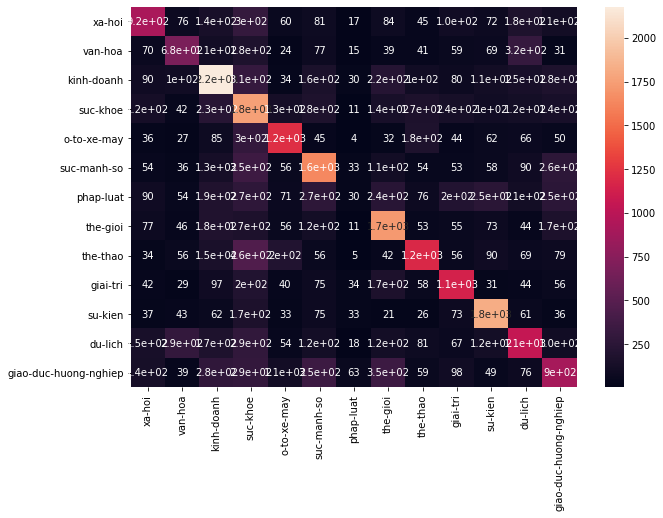

In [16]:
from sklearn.metrics import confusion_matrix
print(len(y_pred.shape)) 
cm=confusion_matrix(y_test, y_pred)
print(cm)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm, index = [cate for cate in categories],
                  columns = [cate for cate in categories])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)